In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the messages from the csv data file
m=pd.read_csv('messages.csv')
m

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [3]:
# finding the top 7 rows in the data
m.head(7)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0


In [4]:
# finding the bottom 7 row of the data
m.tail(7)

,subject,message,label
2886,"from fanny , recommending nek","dear sir or madam , this is not a "" spam "" mes...",1
2887,win $ 300usd and a cruise !,"raquel 's casino , inc . is awarding a cruise ...",1
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0
2892,re : american - english in australia,hello ! i ' m working on a thesis concerning a...,0


In [5]:
# finding the shape of the data
m.shape

(2893, 3)

In [6]:
# finding the columns in the dataset
m.columns
# there are only three columns present in the data set

Index(['subject', 'message', 'label'], dtype='object')

subject    62
message     0
label       0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


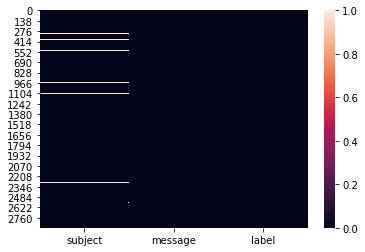

In [7]:
# finding the null values in the data
print(m.isnull().sum())
# using graphical analysis
print(sns.heatmap(m.isnull())) 
# it shows that there is subject columns which are having the null values so we need to fill these null values  

In [8]:
# filling the null values with its heighest reapeting text
m['subject']=m['subject'].fillna(m['subject'].mode()[0])

In [9]:
# after filling the null values 
m.isnull().sum()
# it shows that there is no null values preset

subject    0
message    0
label      0
dtype: int64

In [10]:
# finding the length of the subject and message columns
m['sl']=m.subject.str.len()
m['ml']=m.subject.str.len()

In [11]:
# now cleaning subject column in data i.e removing the punctuation , no . etc
m['subject']=m['subject'].str.replace(r'$','dollars')
# Replace URLs with webaddress
m['subject']=m['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
# replace numbers as well 
m['subject']=m['subject'].str.replace(r'\d+(\.\d+)?','number')
# replace phone numbers 
m['subject']=m['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
# removing the punctuation
m['subject']=m['subject'].str.replace(r'[^\w\d\s]', ' ')
# replace white spcae with single space
m['subject']=m['subject'].str.replace(r'\s+',' ')
# remove leading or trailing white space 
m['subject']=m['subject'].str.replace(r'^\s+|\s+?$','')

In [12]:
# now cleaning subject column in data i.e removing the punctuation , no . etc
m['message']=m['message'].str.replace(r'$','dollars')
# Replace URLs with webaddress
m['message']=m['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
# replace numbers as well 
m['message']=m['message'].str.replace(r'\d+(\.\d+)?','number')
# replace phone numbers 
m['message']=m['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
# removing the punctuation
m['message']=m['message'].str.replace(r'[^\w\d\s]', ' ')
# replace white spcae with single space
m['message']=m['message'].str.replace(r'\s+',' ')
# remove leading or trailing white space 
m['message']=m['message'].str.replace(r'^\s+|\s+?$','')

In [13]:
# label is our target variable
m.label.value_counts()

0    2412
1     481
Name: label, dtype: int64

In [14]:
# finding the new length of cleaned data
m['cleaned_sl']=m.subject.str.len()
m['cleaned_ml']=m.subject.str.len()

In [15]:
# after cleaning the data it looks
m 

,subject,message,label,sl,ml,cleaned_sl,cleaned_ml
0,job posting apple iss research center,content length number apple iss research cente...,0,39,39,37,37
1,sociolinguistics,lang classification grimes joseph e and barbar...,0,16,16,16,16
2,query letter frequencies for text identification,i am posting this inquiry for sergei atamas sa...,0,50,50,48,48
3,risk,a colleague and i are researching the differin...,0,4,4,4,4
4,request book information,earlier this morning i was on the phone with a...,0,24,24,24,24
...,...,...,...,...,...,...,...
2888,love your profile ysuolvpv,hello thanks for stopping by we have taken man...,1,28,28,26,26
2889,you have been asked to join kiddin,the list owner of kiddin has invited you to jo...,1,34,34,34,34
2890,anglicization of composers names,judging from the return post i must have sound...,0,34,34,32,32
2891,re number number comparative method n ary comp...,gotcha there are two separate fallacies in the...,0,54,54,52,52


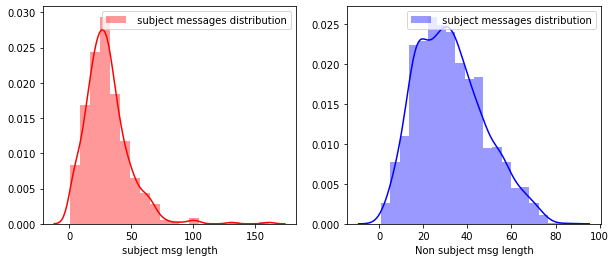

In [16]:
# subject distribution before data claening
f,ax=plt.subplots(1,2,figsize=(10,4))

sns.distplot(m[m['label']==1]['sl'],bins=20,ax=ax[0],label=' subject messages distribution',color='r')
ax[0].set_xlabel('subject msg length')
ax[0].legend()

sns.distplot(m[m['label']==0]['sl'],bins=20,ax=ax[1],label=' subject messages distribution',color='b')
ax[1].set_xlabel('Non subject msg length')
ax[1].legend()

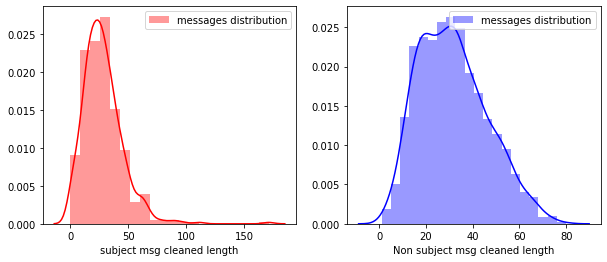

In [17]:
# subject distribution after data claening
f,ax=plt.subplots(1,2,figsize=(10,4))

sns.distplot(m[m['label']==1]['cleaned_sl'],bins=20,ax=ax[0],label='messages distribution',color='r')
ax[0].set_xlabel('subject msg cleaned length')
ax[0].legend()

sns.distplot(m[m['label']==0]['cleaned_sl'],bins=20,ax=ax[1],label='messages distribution',color='b')
ax[1].set_xlabel('Non subject msg cleaned length')
ax[1].legend()

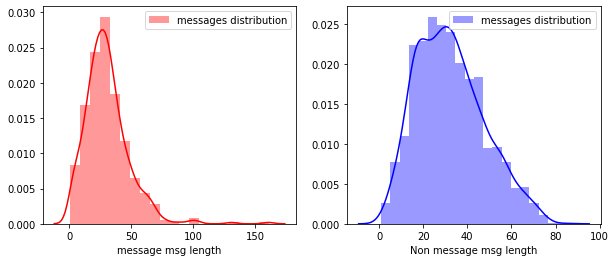

In [18]:
# message distribution before data claening
f,ax=plt.subplots(1,2,figsize=(10,4))

sns.distplot(m[m['label']==1]['ml'],bins=20,ax=ax[0],label='messages distribution',color='r')
ax[0].set_xlabel('message msg length')
ax[0].legend()

sns.distplot(m[m['label']==0]['ml'],bins=20,ax=ax[1],label='messages distribution',color='b')
ax[1].set_xlabel('Non message msg length')
ax[1].legend()

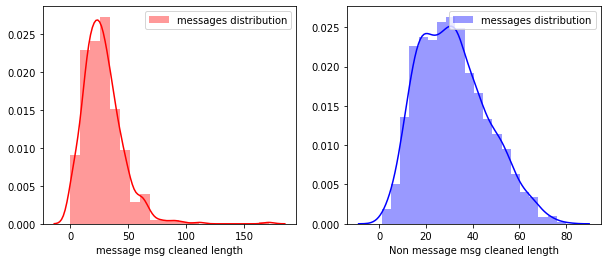

In [19]:
# message distribution after data claening
f,ax=plt.subplots(1,2,figsize=(10,4))

sns.distplot(m[m['label']==1]['cleaned_ml'],bins=20,ax=ax[0],label='messages distribution',color='r')
ax[0].set_xlabel('message msg cleaned length')
ax[0].legend()

sns.distplot(m[m['label']==0]['cleaned_ml'],bins=20,ax=ax[1],label='messages distribution',color='b')
ax[1].set_xlabel('Non message msg cleaned length')
ax[1].legend()

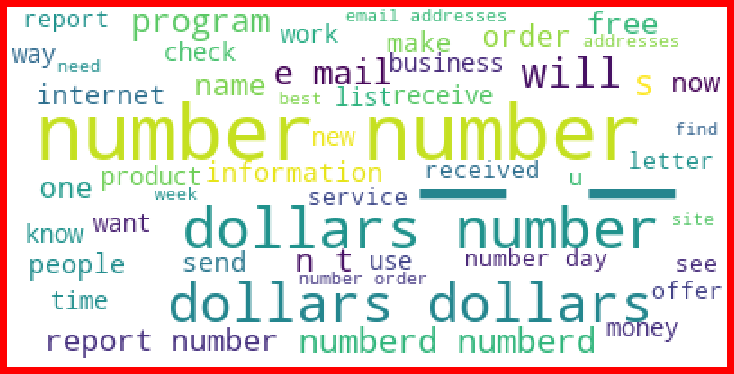

In [20]:
from wordcloud import WordCloud

## Getting sense of loud words in 'message'
abs=m['message'][m['label']==1]
abs_cloud=WordCloud(width=400, height=200,background_color='white',max_words=50).generate(' '.join(abs))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(abs_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

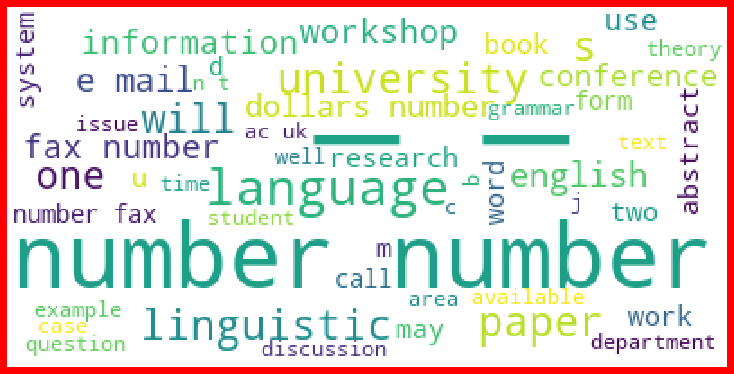

In [21]:
## Getting sense of loud words in 'message'
abs=m['message'][m['label']==0]
abs_cloud=WordCloud(width=400, height=200,background_color='white',max_words=50).generate(' '.join(abs))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(abs_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

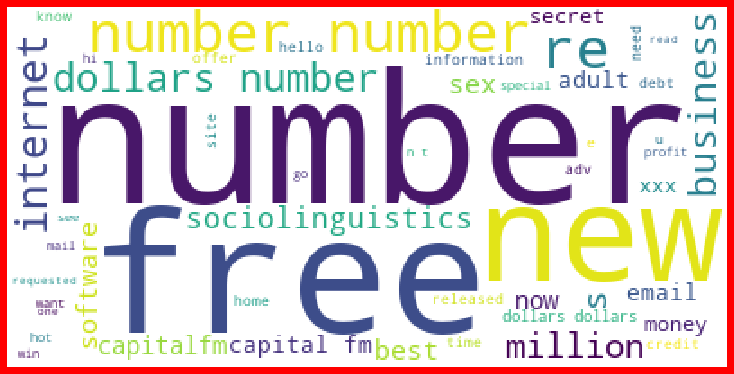

In [22]:
## Getting sense of loud words in 'subject'
abs=m['subject'][m['label']==1]
abs_cloud=WordCloud(width=400, height=200,background_color='white',max_words=50).generate(' '.join(abs))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(abs_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

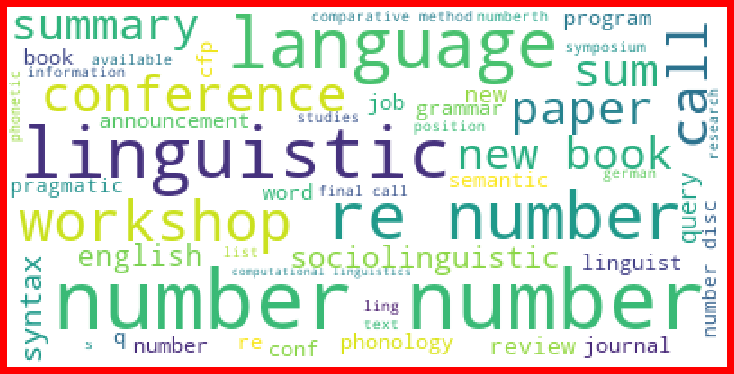

In [23]:
## Getting sense of loud words in 'subject'
abs=m['subject'][m['label']==0]
abs_cloud=WordCloud(width=400, height=200,background_color='white',max_words=50).generate(' '.join(abs))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(abs_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [32]:
# finding the input and output variables in the data
x=m.drop(['label','subject','message'],axis=1)
y=m['label']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [37]:
print(x_train.shape , x_test.shape)
print(y_train.shape , y_test.shape)

(2169, 4) (724, 4)
(2169,) (724,)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [35]:
lgr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
sv=SVC()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
models=[]
models.append(('LogisticRegression',lgr))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',sv))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))

In [38]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for i,model in models:
    print('******************',i,'*******************','\n')
    Model.append(i)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score is ',AS,'\n')
    score.append(AS*100)
    CM=confusion_matrix(y_test,pre)
    print('Confusion Matrix is \n',CM,'\n')
    print('Classification Report is',classification_report(y_test,pre),'\n')
    cs=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross Validation Score is ',cs,'\n')
    cvs.append(cs*100)
    fpr,tpr,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('AUC ROC Score is ',roc_auc,'\n')
    rocscore.append(roc_auc*100)

****************** LogisticRegression ******************* 

Accuracy Score is  0.8162983425414365 

Confusion Matrix is 
 [[585   0]
 [133   6]] 

Classification Report is               precision    recall  f1-score   support

           0       0.81      1.00      0.90       585
           1       1.00      0.04      0.08       139

    accuracy                           0.82       724
   macro avg       0.91      0.52      0.49       724
weighted avg       0.85      0.82      0.74       724
 

Cross Validation Score is  0.8354650363650489 

AUC ROC Score is  0.5215827338129496 

****************** DecisionTreeClassifier ******************* 

Accuracy Score is  0.819060773480663 

Confusion Matrix is 
 [[557  28]
 [103  36]] 

Classification Report is               precision    recall  f1-score   support

           0       0.84      0.95      0.89       585
           1       0.56      0.26      0.35       139

    accuracy                           0.82       724
   macro avg       

In [39]:
result=pd.DataFrame({'Model':Model,'Accuracy Score':score,'CVS':cvs,'ROC AUC':rocscore})
result

,Model,Accuracy Score,CVS,ROC AUC
0,LogisticRegression,81.629834,83.546504,52.158273
1,DecisionTreeClassifier,81.906077,81.922059,60.556478
2,KNeighborsClassifier,82.320442,83.581285,59.715920
3,SVC,80.939227,83.511842,50.359712
4,RandomForestClassifier,81.767956,82.095189,62.939187
5,AdaBoostClassifier,82.044199,83.822842,54.882863
6,GradientBoostingClassifier,83.149171,84.168743,58.583287
